## Greedy

In [12]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../")

from lib.envs.bandits.bandit import BanditEnv
from lib.simulation import Experiment
from lib.envs.bandits.policy import Policy
from lib.utils import randargmax

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
class Greedy(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Greedy"
        self.total_rewards = np.zeros(num_actions, dtype = np.float32)
        self.total_counts = np.zeros(num_actions, dtype = np.float32)
    
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = np.amax(current_averages)
        current_action = randargmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

Distribution: bernoulli [0.15416284 0.7400497  0.26331502 0.53373939 0.01457496]
Optimal action: 1


<Figure size 720x360 with 0 Axes>

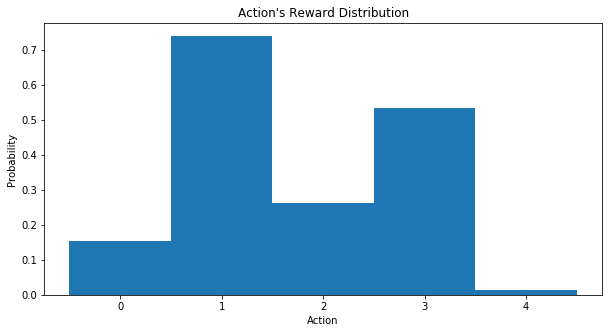

--------------------------------------------------
Policy: Greedy 
Average Reward: 0.1538 
Average Regret: 0.5857933513658738
Arm pulls: [9.996e+03 1.000e+00 1.000e+00 1.000e+00 1.000e+00]


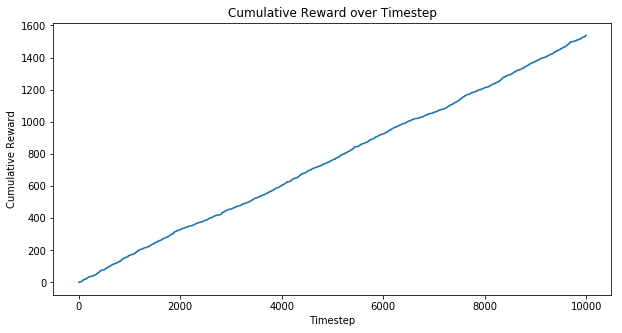

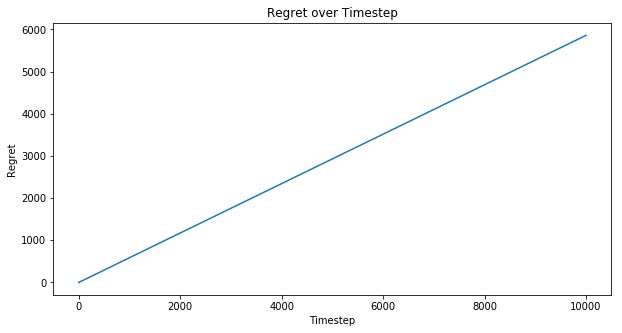

In [14]:
evaluation_seed = 12
num_actions = 5
trials = 10000
distribution = "bernoulli"
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = Greedy(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Distribution: normal [ 0.47298583 -0.68142588  0.2424395  -1.70073563  0.75314283]
Optimal action: 4


<Figure size 720x360 with 0 Axes>

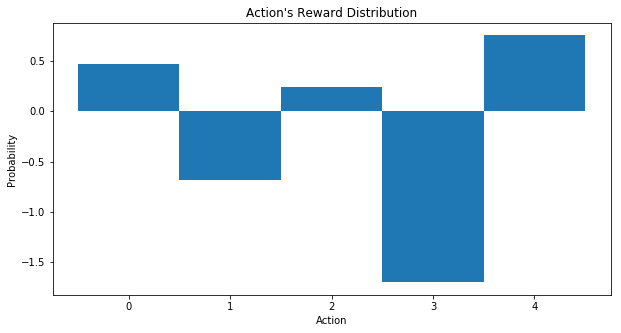

--------------------------------------------------
Policy: Greedy 
Average Reward: 0.7520356715300747 
Average Regret: 0.00046793075210941205
Arm pulls: [1.000e+00 1.000e+00 1.000e+00 1.000e+00 9.996e+03]


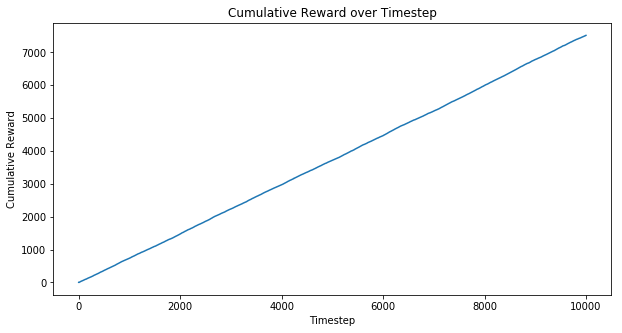

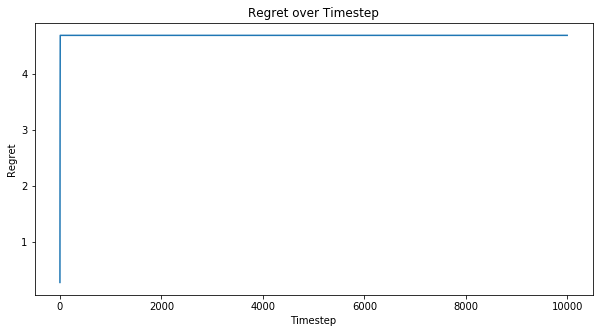

In [16]:
evaluation_seed = 12
num_actions = 5
trials = 10000
distribution = "normal"
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = Greedy(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)